In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv('Engineering_graduate_salary.csv')
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


### Feature Engineering

In [6]:
data.isnull().sum()


ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [7]:
tot_score = ["English","Logical","Quant","ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"]
data["AvgTot_score"] = data[tot_score][data[tot_score]>=0].mean(axis=1)



In [9]:
Drop_feat= ["ID","Gender","DOB","10percentage","10board","12graduation","CollegeID","CollegeCityID","CollegeCityTier","CollegeState"]
data = data.drop(Drop_feat, axis = 1)
data.head()

,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,Quant,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,AvgTot_score
0,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,665,810,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,595.20
1,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,435,210,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,362.50
2,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,475,505,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,425.00
3,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,620,635,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,646.25
4,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,2012,575,495,365,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,437.50


In [17]:
# Number of Attributes or columns in dataset
data.columns.value_counts().sum()

25

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

encoder = LabelEncoder()
data['12board'] = encoder.fit_transform(data['12board'])
data['Degree'] = encoder.fit_transform(data['Degree'])
data['Specialization'] = encoder.fit_transform(data['Specialization'])

In [11]:
X = data.drop("Salary", axis = 1)
y = data["Salary"]


In [12]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [13]:
features = X.columns.to_list()
features

['12percentage',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'collegeGPA',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'AvgTot_score']

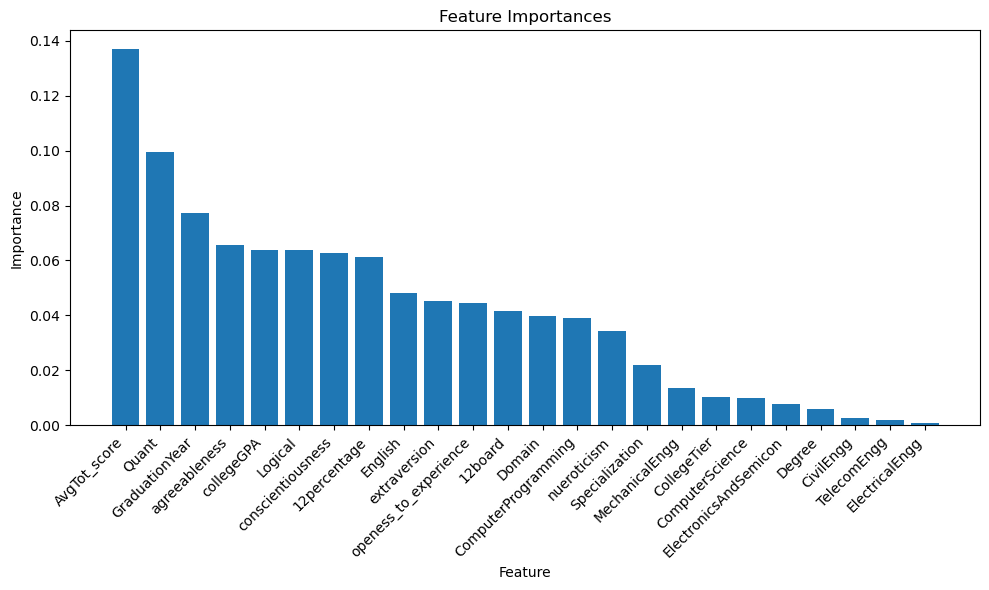

In [15]:
import matplotlib.pyplot as plt

# svc = SVR()
rfr = RandomForestRegressor()
# lr = LinearRegression()
# knr = KNeighborsRegressor()
# gnb =GaussianNB()

rfr.fit(X, y)

importances = rfr.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 8 features
top_8_features = importance_df.iloc[:8, :]['Feature'].tolist()

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
print(top_8_features)

['AvgTot_score', 'Quant', 'GraduationYear', 'agreeableness', 'collegeGPA', 'Logical', 'conscientiousness', '12percentage']


In [18]:
X = X[top_8_features]
X

,AvgTot_score,Quant,GraduationYear,agreeableness,collegeGPA,Logical,conscientiousness,12percentage
0,595.20,810,2013,0.3789,73.82,665,-0.1590,84.00
1,362.50,210,2014,0.0459,65.00,435,1.1336,64.50
2,425.00,505,2011,-0.1232,61.94,475,0.5100,85.17
3,646.25,635,2013,0.2124,80.40,620,-0.4463,86.00
4,437.50,365,2012,-0.7473,64.30,495,-1.4992,75.00
...,...,...,...,...,...,...,...,...
2993,402.60,445,2010,0.9688,70.00,485,-1.1901,73.00
2994,410.00,395,2012,0.0328,75.20,585,-0.1082,77.00
2995,432.50,485,2011,0.1888,73.19,425,-0.8810,65.56
2996,540.00,505,2011,1.2808,74.81,645,1.4374,65.16


In [19]:
y

0       445000
1       110000
2       255000
3       420000
4       200000
         ...  
2993    120000
2994    120000
2995    385000
2996    530000
2997    200000
Name: Salary, Length: 2998, dtype: int64

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(score_func=f_classif, k=2)
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

# # Print the selected features' indices and their respective scores
# selected_indices = selector.get_support(indices=True)
# selected_features = data.feature_names[selected_indices]
# selected_scores = selector.scores_[selected_indices]
# print("Selected Features:")
# for feature, score in zip(selected_features, selected_scores):
#     print(f"{feature}: {score}")

In [ ]:
# # To display dataframe without truncation
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data)  # The full DataFrame will be displayed here


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 35)

In [24]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svc = SVR()
rfr = RandomForestRegressor()
lr = LinearRegression()
knr = KNeighborsRegressor()
gnb =GaussianNB()

svc.fit(X_train, y_train)
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
knr.fit(X_train, y_train)
gnb.fit(X_train, y_train)

algorithms = [svc, rfr, lr, knr, gnb]


for i in algorithms:
    y_pred = i.predict(X_test)

# Calculate metrics
    metrics = {
        'Model': [f"{i}"],
        'MSE': [mean_squared_error(y_test, y_pred)],
        'MAE': [mean_absolute_error(y_test, y_pred)],
        'R2 score': [r2_score(y_test, y_pred)]
    }

    # Display the metrics as a DataFrame
    results_df = pd.DataFrame(metrics)
    print("\nResults:")
    print(results_df)
    
# Display the metrics as a DataFrame
    test_instances = pd.DataFrame(X_test, columns= top_8_features)
    test_instances['True Values'] = y_test.values
    test_instances['Predicted Values'] = y_pred

    print(test_instances)



Results:
   Model           MSE            MAE  R2 score
0  SVR()  2.147886e+10  112308.131209 -0.004373
     AvgTot_score     Quant  GraduationYear  agreeableness  collegeGPA   
0       -0.124043  0.252608        0.001633       1.044902    0.091138  \
1        0.818717  0.416308        0.028825       0.147104   -0.690775   
2       -1.846418 -0.565893       -0.025560      -0.914035   -0.801597   
3       -0.852843 -0.156643        0.001633      -0.097750   -1.663549   
4        0.540124 -0.361268        0.056018       0.961296    0.762229   
..            ...       ...             ...            ...         ...   
595      0.450974  0.129833        0.001633       0.718430   -0.924733   
596      1.554203  0.743708       -0.025560       0.065486    0.060354   
597     -0.485100 -0.320343        0.056018       1.658188   -0.205619   
598     -0.585393  0.007057        0.001633      -0.342604    0.676034   
599      0.322598 -0.164828        0.001633      -0.432489   -0.188380   

     